In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [4]:
# using laTeX fonts
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': [r'\usepackage{amsmath}']})

In [5]:
! pwd

/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22


In [6]:
# generating {mu, sigma, alpha, beta} grid
 
# used to generate mu:
-1 * np.logspace(math.log(abs(-0.05), math.e), math.log(abs(-0.00001), math.e), num=30, endpoint=True, base=math.e);
# used to generate sigma:
np.logspace(math.log(0.00001, math.e), math.log(0.05, math.e), num=30, endpoint=True, base=math.e);

mu = [-0.0500000000000000, -0.0372751426827093, -0.0277887252403267, -0.0207165739660756, -0.0154442650096474, -0.0115137436372836, -0.0085835287378376, -0.0063990451684807, -0.0047705064337644, -0.0035564261597470, -0.0026513258509018, -0.0019765709878144, -0.0014735393118657, -0.0010985277619675, -0.0008189555813651, -0.0006105337229237, -0.0004551546326917, -0.0003393190775256, -0.0002529633405947, -0.0001885848922832, -0.0001405905753532, -0.0001048106751227, -0.0000781366573974, -0.0000582511010648, -0.0000434263620723, -0.0000323744768487, -0.0000241352648763, -0.0000179929088390, -0.0000134137648850, -0.0000100000000000]
sigma = [0.0000100000000000, 0.0000134137648850, 0.0000179929088390, 0.0000241352648763, 0.0000323744768487, 0.0000434263620723, 0.0000582511010648, 0.0000781366573974, 0.0001048106751227, 0.0001405905753532, 0.0001885848922832, 0.0002529633405947, 0.0003393190775256, 0.0004551546326917, 0.0006105337229237, 0.0008189555813651, 0.0010985277619675, 0.0014735393118657, 0.0019765709878144, 0.0026513258509018, 0.0035564261597470, 0.0047705064337644, 0.0063990451684807, 0.0085835287378376, 0.0115137436372836, 0.0154442650096474, 0.0207165739660756, 0.0277887252403267, 0.0372751426827093, 0.0500000000000000]
alpha = [0, -2, -4]
beta = [0, 1000, 3000, 5000, 7000]

mu_sigma = [[x, y] for x in mu for y in sigma]

In [7]:
# used area.nb to compute how much of the probability density of the distribution of fitness effects is above zero; reading the output
# rounding is important! doing up to 4 digits here

dfe_area_0 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=0.csv", header=None)
dfe_area_0_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_0.values.tolist() for item in sublist]
dfe_area_0_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_0.values.tolist() for item in sublist]
dfe_area_0_dict = dict(zip(dfe_area_0_keys, dfe_area_0_values))

dfe_area_2 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-2.csv", header=None)
dfe_area_2_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_2.values.tolist() for item in sublist]
dfe_area_2_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_2.values.tolist() for item in sublist]
dfe_area_2_dict = dict(zip(dfe_area_2_keys, dfe_area_2_values))

dfe_area_4 = pd.read_csv("/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/dfe_area_0-inf_alpha=-4.csv", header=None)
dfe_area_4_keys = ['{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[0])) + ' '
                   + '{:.16f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[1])) + ' '
                   + '{:.0f}'.format(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[2])) 
                   for sublist in dfe_area_4.values.tolist() for item in sublist]
dfe_area_4_values = [round(float(item.replace('*^', 'e').replace('{', '').replace('}', '').replace(',', '').split()[-1]), 4) for sublist in dfe_area_4.values.tolist() for item in sublist]
dfe_area_4_dict = dict(zip(dfe_area_4_keys, dfe_area_4_values))


mu_sigma_area_0 = [[i, j, dfe_area_0_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' 0')] for i in mu for j in sigma]
mu_sigma_area_2 = [[i, j, dfe_area_2_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -2')] for i in mu for j in sigma]
mu_sigma_area_4 = [[i, j, dfe_area_4_dict.get('{:.16f}'.format(i) + ' ' + '{:.16f}'.format(j) + ' -4')] for i in mu for j in sigma]

In [8]:
to_use = []
for alpha_area in [(mu_sigma_area_0, 0), (mu_sigma_area_2, -2), (mu_sigma_area_4, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] > 0.0 and ((alpha_area[0][i - 1][-1] == 0 and alpha_area[0][i][0] == alpha_area[0][i - 1][0]) or (alpha_area[0][i - 1][-1] != 0 and alpha_area[0][i][0] != alpha_area[0][i - 1][0])): # choosing points at the border
            mu_i = alpha_area[0][i][0]
            for j in range(-3, 26): # adding three points below the treshold + as many as I can fit up to 5% positive
                if alpha_area[0][i + j][0] == mu_i and alpha_area[0][i + j][-1] <= 0.05: # checking that we are in the same column and requiring less than 5% to be positive
                    if alpha_area[0][i + j][0] > -0.015 and alpha_area[0][i + j][1] < 0.015: # introducing mu and sigma cut-offs
                        to_use.append([alpha_area[0][i + j][0], alpha_area[0][i + j][1], alpha_area[1], alpha_area[0][i + j][2]])

In [9]:
to_use_rai = []
for alpha_area in [(mu_sigma_area_0, 0), (mu_sigma_area_2, -2), (mu_sigma_area_4, -4)]: 
    for i in range(len(alpha_area[0])):
        if alpha_area[0][i][-1] <= 0.000:
            if alpha_area[0][i][0] > -0.015 and alpha_area[0][i][1] < 0.015: # introducing mu and sigma cut-offs
                to_use_rai.append([alpha_area[0][i][0], alpha_area[0][i][1], alpha_area[1], alpha_area[0][i][2]])

In [10]:
# saving points to use with Rai's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_rai.txt', 'w+') as o:
#     o.writelines(['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + '\n' for x in to_use_rai])

In [16]:
# saving points to use with Fedya's results
# with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_fedya.txt', 'w+') as o:
#     o.writelines(['{:.10f}'.format(x[0]) + ' ' + '{:.10f}'.format(x[1]) + ' ' + '{:.1f}'.format(x[2]) + '\n' for x in to_use if x not in to_use_rai])

In [13]:
with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_fedya.txt') as f:
    points_fedya = [[float(y) for y in x.split()] for x in f.readlines()]

In [14]:
with open('/Users/alyulina/Projects/Kondrashov/Sandpiper/h=sigm/ver22/rns-het_points-to-use_rai.txt') as f:
    points_rai = [[float(y) for y in x.split()] for x in f.readlines()]

Text(0.5, 1.05, '$\\textrm{points used to interpolate rns het}$')

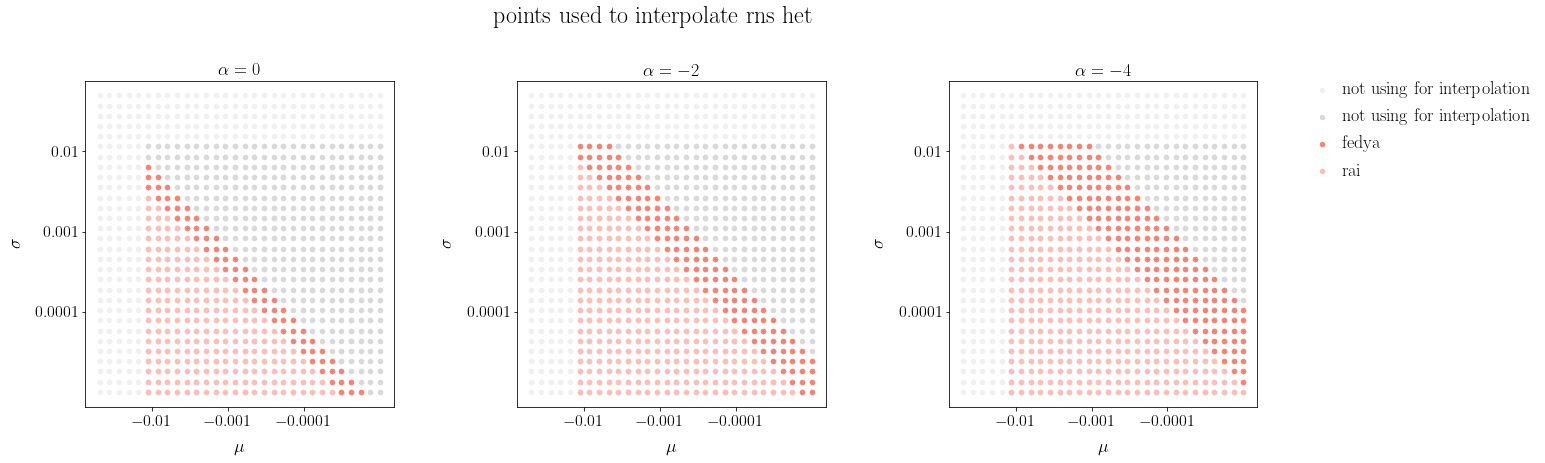

In [15]:
plt.figure(figsize=(21, 6))

grid = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1, 1, 1], wspace=0.4)

plt.subplot(grid[0, 0])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == 0.0], [np.log(y[1]) for y in points_fedya if y[-1] == 0.0], s=20, c='#fa8072') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == 0.0], [np.log(y[1]) for y in points_rai if y[-1] == 0.0], s=20, c='#ffbdb5') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=0$', fontsize=18)


plt.subplot(grid[0, 1])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == -2.0], [np.log(y[1]) for y in points_fedya if y[-1] == -2.0], s=20, c='#fa8072') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == -2.0], [np.log(y[1]) for y in points_rai if y[-1] == -2.0], s=20, c='#ffbdb5') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=-2$', fontsize=18)


plt.subplot(grid[0, 2])
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma], [np.log(y[1]) for y in mu_sigma], s=20, c='#f0f0f0', label=r'$\textrm{not using for interpolation}$') # all points
plt.scatter([-np.log(abs(x[0])) for x in mu_sigma if abs(x[0]) < 0.014], [np.log(y[1]) for y in mu_sigma if abs(y[1]) < 0.014], s=20, c='#d9d9d9', label=r'$\textrm{not using for interpolation}$') # points that we decided to leave
plt.scatter([-np.log(abs(x[0])) for x in points_fedya if x[-1] == -4.0], [np.log(y[1]) for y in points_fedya if y[-1] == -4.0], s=20, c='#fa8072', label=r'$\textrm{fedya}$') # points for which we will use fedya's results
plt.scatter([-np.log(abs(x[0])) for x in points_rai if x[-1] == -4.0], [np.log(y[1]) for y in points_rai if y[-1] == -4.0], s=20, c='#ffbdb5', label=r'$\textrm{rai}$') # points for which we will use rai's results

plt.yticks([np.log(0.01), np.log(0.001), np.log(0.0001)], [r'$0.01$', r'$0.001$', r'$0.0001$'], fontsize=16)
plt.xticks([-np.log(abs(-0.01)), -np.log(abs(-0.001)), -np.log(abs(-0.0001))], [r'$-0.01$', r'$-0.001$', r'$-0.0001$'], fontsize=16)

plt.xlabel(r'$\mu$', labelpad=12, fontsize=18);
plt.ylabel(r'$\sigma$', labelpad=12, fontsize=18);
plt.title(r'$\alpha=-4$', fontsize=18)

plt.legend(frameon=False, prop={'size':18}, handletextpad=0.1, bbox_to_anchor=(1.1, 1.05))

plt.suptitle(r'$\textrm{points used to interpolate rns het}$', fontsize=24, y=1.05)

# plt.savefig('points-to-use-for-rns-het.png', dpi=300, bbox_inches='tight')

RNSv22_mu=-0.0035564262_sigma=0.0003393191_alpha=0.0_beta=0.txt
RNSv8.cpp
Rai's
SBSv8.cpp
area-viz.ipynb
area.m
area.nb
dfe_area_0-inf_alpha=-2.csv
dfe_area_0-inf_alpha=-4.csv
dfe_area_0-inf_alpha=0.csv
dfe_area_1e-6-inf_alpha=-2.csv
dfe_area_1e-6-inf_alpha=-4.csv
dfe_area_1e-6-inf_alpha=0.csv
dfe_area_5e-7-inf_alpha=-2.csv
dfe_area_5e-7-inf_alpha=-4.csv
dfe_area_5e-7-inf_alpha=0.csv
making points.ipynb
notebook-ver22.ipynb
points-to-use-for-rns-het.png
points_to_use-temp.txt
points_to_use.png
points_to_use_fedya-temp.txt
points_to_use_fedya.txt
points_to_use_rai-temp.txt
points_to_use_rai.txt
pos
rns-het_points-to-use_fedya-temp.txt
rns-het_points-to-use_fedya.txt
rns-het_points-to-use_rai.txt
